In [1]:
import numpy as np
import pandas as pd

/home/z/.virtualenvs/ds/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/z/.virtualenvs/ds/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [18]:
dft = pd.read_csv("./Downloads/GlobalLandTemperaturesByMajorCity.csv", parse_dates=[0])
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
dt                               239177 non-null datetime64[ns]
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [6]:
dft.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [7]:
dfp = pd.read_csv('./Downloads/worldcities.csv')
dfp.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [19]:
dft = dft[['dt', 'City', 'AverageTemperature']]
dft.head()

,dt,City,AverageTemperature
0,1849-01-01,Abidjan,26.704
1,1849-02-01,Abidjan,27.434
2,1849-03-01,Abidjan,28.101
3,1849-04-01,Abidjan,26.140
4,1849-05-01,Abidjan,25.427


In [20]:
dft['year'] = dft['dt'].apply(lambda x: x.year)
dft.head()

,dt,City,AverageTemperature,year
0,1849-01-01,Abidjan,26.704,1849
1,1849-02-01,Abidjan,27.434,1849
2,1849-03-01,Abidjan,28.101,1849
3,1849-04-01,Abidjan,26.140,1849
4,1849-05-01,Abidjan,25.427,1849


In [21]:
dft = dft[dft['year'] > 2000]
dft = dft[['City', 'AverageTemperature']]
dft.head()

,City,AverageTemperature
1824,Abidjan,26.920
1825,Abidjan,28.234
1826,Abidjan,28.706
1827,Abidjan,27.702
1828,Abidjan,27.653


In [22]:
dft.groupby('City').median()

,AverageTemperature
City,
Abidjan,27.2130
Addis Abeba,18.0860
Ahmadabad,28.0295
Aleppo,19.0140
Alexandria,21.6985
...,...
Tokyo,13.6305
Toronto,7.2640
Umm Durman,31.1085


In [23]:
dft = dft.groupby('City').median()
dft.head()

,AverageTemperature
City,
Abidjan,27.2130
Addis Abeba,18.0860
Ahmadabad,28.0295
Aleppo,19.0140
Alexandria,21.6985


In [25]:
dft = dft.reset_index()
dft.head()

,City,AverageTemperature
0,Abidjan,27.2130
1,Addis Abeba,18.0860
2,Ahmadabad,28.0295
3,Aleppo,19.0140
4,Alexandria,21.6985


In [27]:
dfp = dfp[['city_ascii', 'population']]
dfp.head()

,city_ascii,population
0,Tokyo,35676000.0
1,New York,19354922.0
2,Mexico City,19028000.0
3,Mumbai,18978000.0
4,Sao Paulo,18845000.0


In [28]:
dfn = pd.merge(dft, dfp, left_on='City', right_on='city_ascii')
dfn.head()

,City,AverageTemperature,city_ascii,population
0,Abidjan,27.2130,Abidjan,3802000.0
1,Ahmadabad,28.0295,Ahmadabad,5375000.0
2,Aleppo,19.0140,Aleppo,2738000.0
3,Alexandria,21.6985,Alexandria,4165000.0
4,Alexandria,21.6985,Alexandria,160035.0


In [29]:
len(dfn)

114

In [32]:
dfp = dfp.groupby('city_ascii').max().reset_index()
dfp.head()

,city_ascii,population
0,'s-Hertogenbosch,134520.0
1,A Coruna,370610.0
2,Aalborg,122219.0
3,Aarau,15501.0
4,Aarhus,237551.0


In [33]:
dfn = pd.merge(dft, dfp, left_on='City', right_on='city_ascii')
dfn.head()

,City,AverageTemperature,city_ascii,population
0,Abidjan,27.2130,Abidjan,3802000.0
1,Ahmadabad,28.0295,Ahmadabad,5375000.0
2,Aleppo,19.0140,Aleppo,2738000.0
3,Alexandria,21.6985,Alexandria,4165000.0
4,Ankara,11.5720,Ankara,3716000.0


In [34]:
len(dfn)

83

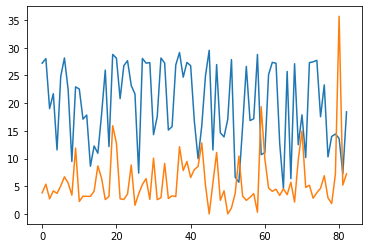

In [36]:
import matplotlib.pyplot as plt

plt.plot(dfn['AverageTemperature'])
plt.plot(dfn['population']/1_000_000)

In [37]:
dfn.corr()

,AverageTemperature,population
AverageTemperature,1.000000,-0.097966
population,-0.097966,1.000000


In [38]:
np.corrcoef(dfn['AverageTemperature'], dfn['population'])

array([[ 1.        , -0.09796642],
       [-0.09796642,  1.        ]])